<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9A%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D1%8B_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Координаты изображений</b></h1>

В этом уроке научимся находить координаты изображения.

In [ ]:
# import the necessary packages
# импортируем необходимые модули
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

Загрузка файлов

In [ ]:
!wget http://dataudt.ru/datasets/cv/Lesson_02.Image_coordinates.zip
!unzip Lesson_02.Image_coordinates.zip
%cd /content/Lesson_02.Image_coordinates

--2022-01-22 10:20:44--  http://dataudt.ru/datasets/cv/Lesson_02.Image_coordinates.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4716639 (4.5M) [application/zip]
Saving to: ‘Lesson_02.Image_coordinates.zip’

Lesson_02.Image_coo 100%[===================>]   4.50M  3.29MB/s    in 1.4s    

2022-01-22 10:20:46 (3.29 MB/s) - ‘Lesson_02.Image_coordinates.zip’ saved [4716639/4716639]

Archive:  Lesson_02.Image_coordinates.zip
  inflating: Lesson_02.Image_coordinates/Color_and_chunks.py  
  inflating: Lesson_02.Image_coordinates/elephants.png  
  inflating: Lesson_02.Image_coordinates/giraffe.png  
  inflating: Lesson_02.Image_coordinates/tigers.png  
  inflating: Lesson_02.Image_coordinates/zebra.png  
/content/Lesson_02.Image_coordinates


In [ ]:
# construct the argument parser and parse the arguments
# создадим парсер и укажем аргументы
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())
# пока мы используем Jupyter Notebooks мы можем заменить наш парсер
# явными аргументами и значениями
args = {
	"image": "/content/Lesson_02.Image_coordinates/giraffe.png",

}

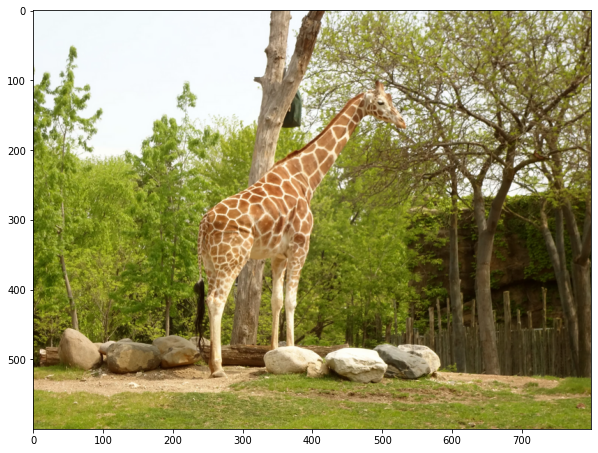

In [ ]:
# load the image, grab its dimensions, and show it
# загрузим изображение, захватим его размеры и покажем его
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
# сконвертируем изображение из BGR в RGB пространство
# это нужно для корректного отображения изображения с помощью библиотеки matplotlib, так как
# open cv хранит изображения в формате BRG, а matplotlib требует изображение в формате RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()


Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0
Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


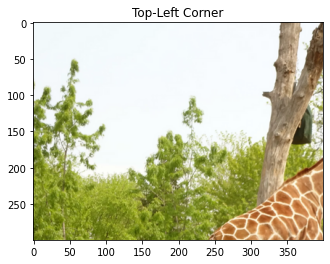

In [ ]:
# images are just NumPy arrays. The top-left pixel can be found at (0, 0)
# изображения - это просто массивы NumPy. Верхний левый пиксель находится в (0, 0)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b))

# now, let's change the value of the pixel at (0, 0) and make it red
# теперь давайте изменим значение пикселя в (0, 0) и сделаем его красным
image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b))

# compute the center of the image, which is simply the width and height
# divided by two
# вычисляем центр изображения, просто разделив ширину и высоту на два
(cX, cY) = (w // 2, h // 2)

# since we are using NumPy arrays, we can apply slicing and grab large chunks
# of the image -- let's grab the top-left corner
# поскольку мы используем массивы NumPy, мы можем применить нарезку
# и захватить большие куски изображения
# давайте возьмем верхний левый угол
tl = image[0:cY, 0:cX]
plt.imshow(tl)
plt.title('Top-Left Corner')

# in a similar fashion, let's grab the top-right, bottom-right, and bottom-left
# corners and dispaly them
# аналогичным образом возьмем верхний правый, 
# нижний правый и нижний левый углы
# и отобразим их
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]

Text(0.5, 1.0, 'Top-Right Corner')

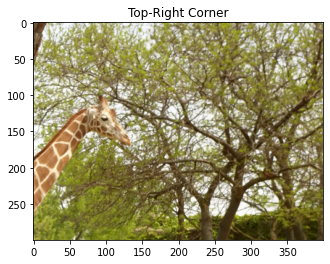

In [ ]:
plt.imshow(tr)
plt.title('Top-Right Corner')

Text(0.5, 1.0, 'Bottom-Right Corner')

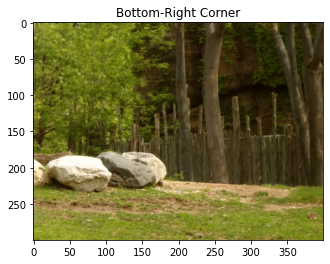

In [ ]:
plt.imshow(br)
plt.title('Bottom-Right Corner')

Text(0.5, 1.0, 'Bottom-Left Corner')

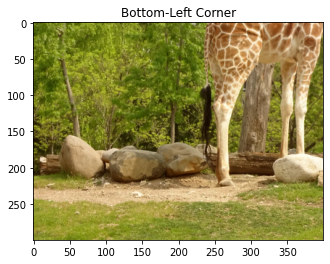

In [ ]:
plt.imshow(bl)
plt.title('Bottom-Left Corner')